Basic Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   EmployeeID        20 non-null     int64         
 1   Department        20 non-null     object        
 2   Role              20 non-null     object        
 3   Age               20 non-null     int64         
 4   Experience_Years  20 non-null     int64         
 5   Salary            20 non-null     int64         
 6   Hired_Date        20 non-null     datetime64[ns]
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 1.2+ KB
None

Summary Statistics:
       EmployeeID        Age  Experience_Years        Salary  \
count    20.00000  20.000000         20.000000     20.000000   
mean     10.50000  28.900000          4.400000  60050.000000   
min       1.00000  24.000000          2.000000  45000.000000   
25%       5.75000  26.750000          3.000000  5

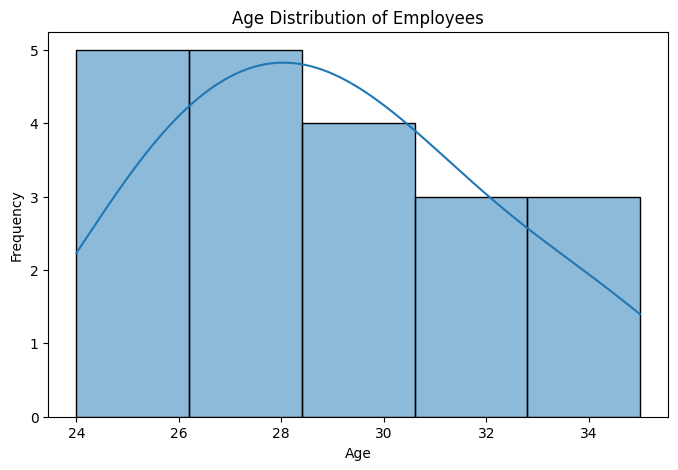

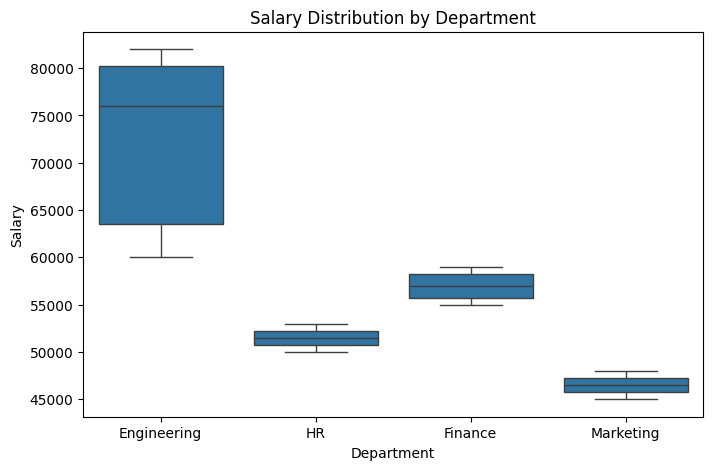

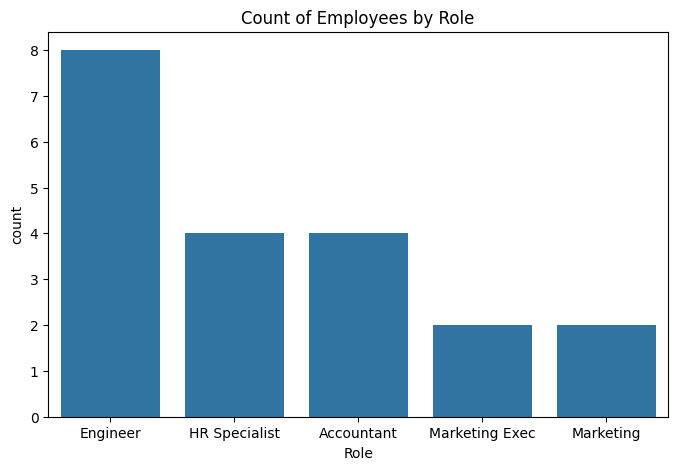


Correlation matrix:
                       Age  Experience_Years    Salary
Age               1.000000          0.945917  0.623243
Experience_Years  0.945917          1.000000  0.543248
Salary            0.623243          0.543248  1.000000


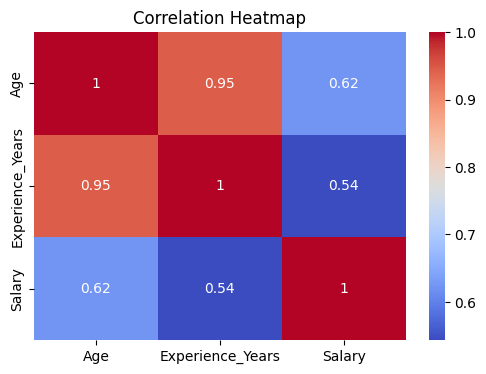


T-test between Engineers and Non-Engineers Salary:
T-statistic: 6.78, P-value: 0.0000

Engineers Summary:
             Age  Experience_Years        Salary
count   8.000000          8.000000      8.000000
mean   29.875000          4.875000  72625.000000
std     3.870677          2.232071   9132.946638
min    25.000000          2.000000  60000.000000
25%    26.750000          3.000000  63500.000000
50%    29.500000          4.500000  76000.000000
75%    33.250000          7.000000  80250.000000
max    35.000000          8.000000  82000.000000

Average age of Engineers: 29.88
Average salary of Engineers: $72625.00


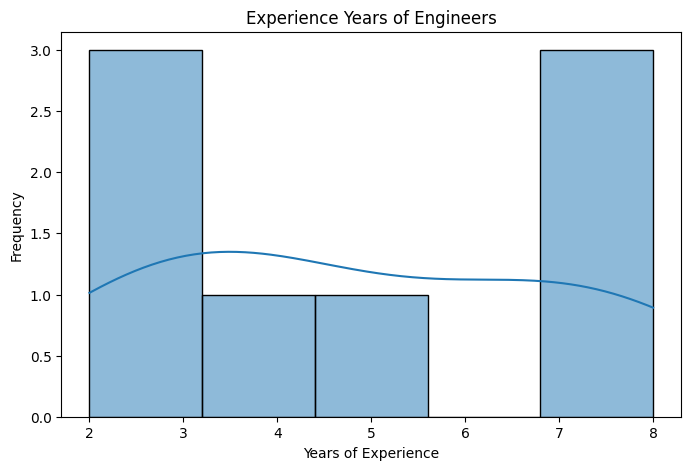

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Sample HR hiring data
data = {
    'EmployeeID': range(1, 21),
    'Department': ['Engineering', 'HR', 'Finance', 'Engineering', 'Marketing', 'Engineering', 'HR', 'Finance', 'Engineering', 'Marketing',
                   'Engineering', 'HR', 'Finance', 'Engineering', 'Marketing', 'Engineering', 'HR', 'Finance', 'Engineering', 'Marketing'],
    'Role': ['Engineer', 'HR Specialist', 'Accountant', 'Engineer', 'Marketing Exec', 'Engineer', 'HR Specialist', 'Accountant', 'Engineer', 'Marketing',
             'Engineer', 'HR Specialist', 'Accountant', 'Engineer', 'Marketing Exec', 'Engineer', 'HR Specialist', 'Accountant', 'Engineer', 'Marketing'],
    'Age': [25, 30, 28, 35, 27, 26, 32, 29, 31, 24, 33, 29, 28, 34, 26, 27, 31, 30, 28, 25],
    'Experience_Years': [2, 5, 3, 7, 4, 3, 6, 4, 5, 2, 8, 5, 4, 7, 3, 4, 6, 5, 3, 2],
    'Salary': [60000, 50000, 55000, 80000, 45000, 62000, 52000, 58000, 75000, 47000,
               82000, 53000, 56000, 81000, 48000, 64000, 51000, 59000, 77000, 46000],
    'Hired_Date': pd.date_range(start='2021-01-01', periods=20, freq='ME')
}

# Create DataFrame
df = pd.DataFrame(data)

# Filter for Engineers
engineers_df = df[df['Role'] == 'Engineer']

# Data Exploration
print("Basic Info:")
print(df.info())

print("\nSummary Statistics:")
print(df.describe())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Visualization: Distribution of Age
plt.figure(figsize=(8, 5))
sns.histplot(df['Age'], bins=5, kde=True)
plt.title('Age Distribution of Employees')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Visualization: Salary distribution by Department
plt.figure(figsize=(8, 5))
sns.boxplot(x='Department', y='Salary', data=df)
plt.title('Salary Distribution by Department')
plt.show()

# Count plot of roles
plt.figure(figsize=(8, 5))
sns.countplot(x='Role', data=df)
plt.title('Count of Employees by Role')
plt.show()

# Correlation matrix
corr = df[['Age', 'Experience_Years', 'Salary']].corr()
print("\nCorrelation matrix:")
print(corr)

# Heatmap of correlations
plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Basic statistical tests: T-test between Engineers and others on Salary
engineer_salary = engineers_df['Salary']
non_engineer_df = df[df['Role'] != 'Engineer']
non_engineer_salary = non_engineer_df['Salary']

t_stat, p_value = stats.ttest_ind(engineer_salary, non_engineer_salary)
print(f"\nT-test between Engineers and Non-Engineers Salary:")
print(f"T-statistic: {t_stat:.2f}, P-value: {p_value:.4f}")

# Summary of Engineers
print("\nEngineers Summary:")
print(engineers_df[['Age', 'Experience_Years', 'Salary']].describe())

# Insights:
# - Average age of engineers
avg_age_engineers = engineers_df['Age'].mean()
print(f"\nAverage age of Engineers: {avg_age_engineers:.2f}")

# - Average salary of engineers
avg_salary_engineers = engineers_df['Salary'].mean()
print(f"Average salary of Engineers: ${avg_salary_engineers:.2f}")

# - Experience distribution
plt.figure(figsize=(8,5))
sns.histplot(engineers_df['Experience_Years'], bins=5, kde=True)
plt.title('Experience Years of Engineers')
plt.xlabel('Years of Experience')
plt.ylabel('Frequency')
plt.show()